## **Setting up the necessities**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
! pip install -q transformers[sentencepiece] fastbook fastai ohmeow-blurr nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.1/81.1 kB 6.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 887.5/887.5 MB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 849.3/849.3 kB 59.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 557.1/557.1 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 317.1/317.1 MB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━

In [ ]:
import torch
from transformers import AutoModelForSequenceClassification, AutoConfig
from fastai.text.all import *
from blurr.text.data.all import *
from blurr.text.modeling.all import *

/usr/local/lib/python3.10/dist-packages/blurr/text/modeling/question_answering.py:31: FutureWarning: load_metric is deprecated and will be removed in the next major version of datasets. Use 'evaluate.load' instead, from the new library 🤗 Evaluate: https://huggingface.co/docs/evaluate
  squad_metric = load_metric("squad")


The repository for squad contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/squad.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/Multi Label Dataset Classifier

/content/drive/My Drive/Multi Label Dataset Classifier


## **Data**

In [ ]:
df = pd.read_csv("dataset_info.csv")
df.head()

,title,url,description,categories
0,Spotify Songs Album,https://www.kaggle.com/datasets/zeesolver/spotfy,"CONTEXT:This dataset provides concise details about music tracks and their performance across various platforms. It includes essential information like track name, artist(s), release date, and presence in popular playlists and charts on platforms like Spotify, Apple Music, Deezer, and Shazam. Additionally, it features metrics such as BPM, key, mode, danceability, valence, energy, acousticness, instrumentalness, and liveness_speechiness, which offer insights into the musical characteristics and appeal of each track. With this data, analysts can evaluate the popularity, genre, and audience e...","Arts and Entertainment,Music,Data Visualization,Exploratory Data Analysis,Websites"
1,Netflix Movies and TV Shows,https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows,"Netflix stands as a leading force in the realm of media and video streaming. With a staggering array of over 8,000 movies and TV shows accessible on their platform, as of mid-2021, their global subscriber count exceeds 200 million. This tabulated dataset comprehensively catalogues all offerings on Netflix, including vital details such as cast, directors, ratings, release year, duration, and more.Dataset Overview:The Netflix Titles dataset is a comprehensive compilation of movies and TV shows available on Netflix, covering various aspects such as the title type, director, cast, country of p...","Arts and Entertainment,Movies and TV Shows,Data Visualization,Exploratory Data Analysis,Artificial Intelligence"
2,Amazon Bestselling Books,https://www.kaggle.com/datasets/khushikhushikhushi/amazon-bestselling-books,"This dataset contains information about the top-rated books listed on Amazon's Best Sellers in Books section. The data was collected using a web scraping script that iterates through multiple pages of the bestseller list. The dataset includes details such as the book title, author name, rating, and price.Book Name: The title of the book.Author Name: The author(s) of the book.Rating: The rating of the book as given by Amazon customers.Price: The listed price of the book on Amazon.","Computer Science,Beginner,Literature,E-Commerce Services,English"
3,Netflix Stock Price Dataset 🎥🍿🎬📊,https://www.kaggle.com/datasets/mayankanand2701/netflix-stock-price-dataset,"Netflix, Inc. is an American subscription streaming service and production company founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Initially, Netflix started as a DVD rental service, pioneering the model of online rentals with no late fees. In 2007, the company transitioned into streaming media, revolutionizing the entertainment industry by offering a vast library of movies and TV shows accessible on-demand. Netflix further expanded its influence by producing original content, beginning with the series ""House of Cards"" in 2013. Today, Netflix is a global po...","Business,Arts and Entertainment,Movies and TV Shows,Tabular,Investing,Data Visualization,Exploratory Data Analysis"
4,Vehicle Population Statistics,https://www.kaggle.com/datasets/prasad22/vehicle-population-statistics,This is a tabular dataset consisting details about 22 types of vehicle population in 13 regions Maharashtra State recorded during the year 2000 to 2018.Below is the list variable dataset contains -Sr No.YearRegionCategoryMotor CyclesScootersMopedCarsJeepsStn. WagonsTaxis meter fitedLuxury /Turist Cabs/,"Tabular,Automobiles and Vehicles,Transportation,Exploratory Data Analysis,Clustering"


In [ ]:
df.shape

(20942, 4)

In [ ]:
df = df.dropna().reset_index(drop=True)
df.shape

(20904, 4)

In [ ]:
df = df.drop_duplicates(subset='url')
df.shape

(19920, 4)

In [ ]:
df['categories'] = df['categories'].apply(lambda x: x.split(','))

# Convert categories to string type
df['categories'] = df['categories'].astype(str)

categories_list = df.categories.to_list()
category_count = {}
for categories in categories_list:
  category_list = eval(categories)
  for category in category_list:
    if category in category_count.keys():
      category_count[category] += 1
    else:
      category_count[category] = 1
print(f"Number of Categories: {len(category_count)}")
print(category_count)

Number of Categories: 437
{'Arts and Entertainment': 915, 'Music': 249, 'Data Visualization': 958, 'Exploratory Data Analysis': 724, 'Websites': 82, 'Movies and TV Shows': 222, 'Artificial Intelligence': 1123, 'Computer Science': 5493, 'Beginner': 1166, 'Literature': 160, 'E-Commerce Services': 127, 'English': 272, 'Business': 1736, 'Tabular': 1312, 'Investing': 225, 'Automobiles and Vehicles': 320, 'Transportation': 130, 'Clustering': 274, 'Games': 242, 'Video Games': 159, 'Education': 5947, 'Universities and Colleges': 1686, 'Categorical': 445, 'Healthcare': 246, 'Global': 157, 'Chemistry': 40, 'Finance': 362, 'Banking': 168, 'Data Cleaning': 434, 'Earth and Nature': 1872, 'Atmospheric Science': 35, 'Advanced': 223, 'Cancer': 149, 'Classification': 3404, 'Medicine': 157, 'Weather and Climate': 77, 'datetime': 24, 'Data Analytics': 935, 'People': 136, 'Feature Engineering': 155, 'Social Networks': 206, 'Deep Learning': 1385, 'Python': 649, 'Neural Networks': 218, 'Economics': 168, 'Re

In [ ]:
threshold = int(len(df) * 0.005)
rare_categories = [key for key, value in category_count.items() if value < threshold]
print(len(rare_categories))
print(rare_categories[:10])

334
['Websites', 'Chemistry', 'Atmospheric Science', 'Weather and Climate', 'datetime', 'Restaurants', 'Energy', 'Renewable Energy', 'Make-Up and Cosmetics', 'Heart Conditions']


In [ ]:
categories_list = df.categories.to_list()
revised_category_list = []
indices_to_drop = []

for idx, categories in enumerate(categories_list):
  category_list = eval(categories)
  revised_categories = []

  for category in category_list:
    if category not in rare_categories:
      revised_categories.append(category)

  if len(revised_categories) == 0:
    indices_to_drop.append(idx)
  else:
    revised_category_list.append(revised_categories)

df = df.drop(indices_to_drop).reset_index(drop=True)
df.shape

(19879, 4)

In [ ]:
df['revised_categories'] = revised_category_list

In [ ]:
df.tail()

,title,url,description,categories,revised_categories
19874,Boat vs Sea Images Dataset,https://www.kaggle.com/datasets/waqasahmedbasharat/boat-vs-sea-images-dataset,"Description:Dive into the captivating world of maritime contrasts with the Boat vs Sea Images Dataset. This curated collection comprises 1000 high-quality images capturing the interplay between boats and the expansive sea. Each image encapsulates the essence of maritime adventures, showcasing boats of various types against the backdrop of the ever-changing sea.Key Features:Visual Dichotomy: Witness the dynamic contrast between boats and the vast sea, highlighting the unique relationship between vessels and their natural environment.Diverse Boat Types: Explore a variety of boats, including ...","['Image', 'Classification', 'Binary Classification']","[Image, Classification, Binary Classification]"
19875,Horse Survival Dataset,https://www.kaggle.com/datasets/yasserh/horsesurvivalprognostication,"Description:Predict whether or not a horse can survive based upon past medical conditions.Noted by the ""outcome"" variable in the data.Content:All of the binary representation have been converted into the words they actually represent. However, a fuller description is provided by the data dictionary (datadict.txt).There are a lot of NA's in the data. This is the real struggle here. Try to find a way around it through imputation or other means.Attribute Information:1: surgery?1 = Yes, it had surgery2 = It was treated without surgery2: Age1 = Adult horse2 = Young (< 6 months)","['Beginner', 'Classification', 'Healthcare', 'Drugs and Medications', 'Hospitals and Treatment Centers']","[Beginner, Classification, Healthcare]"
19876,Bee Dataset BUT-HS,https://www.kaggle.com/datasets/imonbilk/bee-dataset-but-hs,"Please note: This dataset is a part of the submitted manuscript Varroa destructor detection on honey bees using hyperspectral imagery and multivariate statistics.The Bee Dataset BUT-HS is a hyperspectral (HS) dataset containing six HS images of bee detritus, western honey bees Apis meliffera and Varroa destructor parasitic mite (Varroa mite). This dataset is organised as follows:Folder BeesMixedDetritus contains bees mixed up with detritus (Fig. 1: upper left).Folder BeeDetritusMites contains separated bees, detritus and Varroa mites (Fig. 1: upper right).Folder BeesOnly contains fresh bee...","['Biology', 'Image', 'Classification']","[Biology, Image, Classification]"
19877,Ankur's Beer Data Set,https://www.kaggle.com/datasets/ankurnapa/ankurs-beer-data-set,"I created this data with my own 10+ years of Beer Brewing Experience.In this dataset, there are the following columns:Brew No. - Batch Id numberOG- Original Gravity (amount of fermentable sugar present in wort before fermentation)ABV - Alcohol by volume in final beer before packagingpH - is a measure of how acidic/basic beer is before packagingIBU - is an abbreviation for the International Bitterness Units scale, a gauge of beer's bitternessstyle -is a term used to differentiate and categorize beers by various factors, including appearance, flavour, ingredients, production method, history,...","['Beginner', 'Classification', 'Alcohol', 'India', 'AutoML']","[Beginner, Classification, India]"
19878,Dota2 Games Results,https://www.kaggle.com/datasets/joebeachcapital/dota2-games-results,"Dota 2 is a popular computer game with two teams of 5 players. At the start of the game each player chooses a unique hero with different strengths and weaknesses. The dataset is reasonably sparse as only 10 of 113 possible heroes are chosen in a given game. All games were played in a space of 2 hours on the 13th of August, 2016The data was collected using: https://gist.github.com/da-steve101/1a7ae319448db431715bd75391a66e1bAttribute InformationEach row of the dataset is a single game with the following features (in the order in the vector):Team won the game (1 or -1)Cluster ID (related to ...","['Games', 'Classification', 'Clustering']","[Gam

In [ ]:
revised_categories_list = df.revised_categories.to_list()
revised_category_count = {}
for categories in revised_categories_list:
  category_list = categories
  for category in category_list:
    if category in revised_category_count.keys():
      revised_category_count[category] += 1
    else:
      revised_category_count[category] = 1
print(f"Number of Categories: {len(revised_category_count)}")
print(revised_category_count)

Number of Categories: 103
{'Arts and Entertainment': 915, 'Music': 249, 'Data Visualization': 958, 'Exploratory Data Analysis': 724, 'Movies and TV Shows': 222, 'Artificial Intelligence': 1123, 'Computer Science': 5493, 'Beginner': 1166, 'Literature': 160, 'E-Commerce Services': 127, 'English': 272, 'Business': 1736, 'Tabular': 1312, 'Investing': 225, 'Automobiles and Vehicles': 320, 'Transportation': 130, 'Clustering': 274, 'Games': 242, 'Video Games': 159, 'Education': 5947, 'Universities and Colleges': 1686, 'Categorical': 445, 'Healthcare': 246, 'Global': 157, 'Finance': 362, 'Banking': 168, 'Data Cleaning': 434, 'Earth and Nature': 1872, 'Advanced': 223, 'Cancer': 149, 'Classification': 3404, 'Medicine': 157, 'Data Analytics': 935, 'People': 136, 'Feature Engineering': 155, 'Social Networks': 206, 'Deep Learning': 1385, 'Python': 649, 'Neural Networks': 218, 'Economics': 168, 'Primary and Secondary Schools': 395, 'Regression': 294, 'News': 255, 'Biology': 413, 'Animals': 213, 'Hea

In [ ]:
encode_category_types = { key: idx for idx, (key, value) in enumerate(revised_category_count.items())}
with open("category_types_encoded.json", "w") as fp:
  json.dump(encode_category_types, fp)

In [ ]:
# We need this because for multilabel classification all genres have possibility to be present in the predictions
categorical_genre_list = []
revised_genres_list = df.revised_categories.to_list()

for revised_genres in revised_genres_list:
  categorical_list = [0] * len(encode_category_types)
  for genre in revised_genres:
    genre_type_index = encode_category_types[genre]
    categorical_list[genre_type_index] = 1
  categorical_genre_list.append(categorical_list)

categorical_genre_list[3][:23]

[1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
df['dataset_cat_list'] = categorical_genre_list
df.head()

,title,url,description,categories,revised_categories,dataset_cat_list
0,Spotify Songs Album,https://www.kaggle.com/datasets/zeesolver/spotfy,"CONTEXT:This dataset provides concise details about music tracks and their performance across various platforms. It includes essential information like track name, artist(s), release date, and presence in popular playlists and charts on platforms like Spotify, Apple Music, Deezer, and Shazam. Additionally, it features metrics such as BPM, key, mode, danceability, valence, energy, acousticness, instrumentalness, and liveness_speechiness, which offer insights into the musical characteristics and appeal of each track. With this data, analysts can evaluate the popularity, genre, and audience e...","['Arts and Entertainment', 'Music', 'Data Visualization', 'Exploratory Data Analysis', 'Websites']","[Arts and Entertainment, Music, Data Visualization, Exploratory Data Analysis]","[1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
1,Netflix Movies and TV Shows,https://www.kaggle.com/datasets/rahulvyasm/netflix-movies-and-tv-shows,"Netflix stands as a leading force in the realm of media and video streaming. With a staggering array of over 8,000 movies and TV shows accessible on their platform, as of mid-2021, their global subscriber count exceeds 200 million. This tabulated dataset comprehensively catalogues all offerings on Netflix, including vital details such as cast, directors, ratings, release year, duration, and more.Dataset Overview:The Netflix Titles dataset is a comprehensive compilation of movies and TV shows available on Netflix, covering various aspects such as the title type, director, cast, country of p...","['Arts and Entertainment', 'Movies and TV Shows', 'Data Visualization', 'Exploratory Data Analysis', 'Artificial Intelligence']","[Arts and Entertainment, Movies and TV Shows, Data Visualization, Exploratory Data Analysis, Artificial Intelligence]","[1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
2,Amazon Bestselling Books,https://www.kaggle.com/datasets/khushikhushikhushi/amazon-bestselling-books,"This dataset contains information about the top-rated books listed on Amazon's Best Sellers in Books section. The data was collected using a web scraping script that iterates through multiple pages of the bestseller list. The dataset includes details such as the book title, author name, rating, and price.Book Name: The title of the book.Author Name: The author(s) of the book.Rating: The rating of the book as given by Amazon customers.Price: The listed price of the book on Amazon.","['Computer Science', 'Beginner', 'Literature', 'E-Commerce Services', 'English']","[Computer Science, Beginner, Literature, E-Commerce Services, English]","[0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...]"
3,Netflix Stock Price Dataset 🎥🍿🎬📊,https://www.kaggle.com/datasets/mayankanand2701/netflix-stock-price-dataset,"Netflix, Inc. is an American subscription streaming service and production company founded in 1997 by Reed Hastings and Marc Randolph in Scotts Valley, California. Initially, Netflix started as a DVD rental service, pioneering the model of online rentals with no late fees. In 2007, the company transitioned into streaming media, revolution

## **Dataloaders and Model Training**

In [ ]:
labels = list(encode_category_types.keys())

In [ ]:
model1_name = "distilroberta-base"
model1_cls = AutoModelForSequenceClassification
config = AutoConfig.from_pretrained(model1_name)
config.num_labels = len(labels)

hf_arch, hf_config, hf_tokenizer, hf_model = get_hf_objects(model1_name, model_cls=model1_cls, config=config)
hf_model.config.problem_type = "multi_label_classification"

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

In [ ]:
blocks = (TextBlock(hf_arch, hf_config, hf_tokenizer, hf_model), MultiCategoryBlock(encoded=True,vocab=labels))
dblock = DataBlock(blocks=blocks, get_x=ColReader('description'), get_y=ColReader('dataset_cat_list'), splitter=RandomSplitter(valid_pct=0.1, seed=42))

In [ ]:
dls = dblock.dataloaders(df, bs=32)
torch.save(dls, "dataloaders/dls-multilabel-distilroberta-dataset-classifier.pkl")

In [ ]:
# dls = torch.load("dataloaders/dls-multilabel-distilroberta-dataset-classifier.pkl")

In [ ]:
dls.vocab

['Arts and Entertainment', 'Music', 'Data Visualization', 'Exploratory Data Analysis', 'Movies and TV Shows', 'Artificial Intelligence', 'Computer Science', 'Beginner', 'Literature', 'E-Commerce Services', 'English', 'Business', 'Tabular', 'Investing', 'Automobiles and Vehicles', 'Transportation', 'Clustering', 'Games', 'Video Games', 'Education', 'Universities and Colleges', 'Categorical', 'Healthcare', 'Global', 'Finance', 'Banking', 'Data Cleaning', 'Earth and Nature', 'Advanced', 'Cancer', 'Classification', 'Medicine', 'Data Analytics', 'People', 'Feature Engineering', 'Social Networks', 'Deep Learning', 'Python', 'Neural Networks', 'Economics', 'Primary and Secondary Schools', 'Regression', 'News', 'Biology', 'Animals', 'Health', 'Social Science', 'Health Conditions', 'Audio', 'Food', 'Sports', 'Football', 'Law', 'Science and Technology', 'Standardized Testing', 'Binary Classification', 'Retail and Shopping', 'United States', 'Employment', 'Text', 'Internet', 'Programming', 'Inter

In [ ]:
dls.show_batch(dataloaders=dls, max_n=4, trunc_at=512)

,text,target
0,!pip freezeabsl-py==0.12.0adal @ file:///home/conda/feedstock_root/build_artifacts/adal_1611297630154/workaffine==2.3.0aiobotocore==1.3.0aiohttp @ file:///home/conda/feedstock_root/build_artifacts/aiohttp_1614280873252/workaiohttp-cors==0.7.0aioitertools==0.7.1aioredis==1.3.1albumentations==0.5.2alembic==1.5.8allennlp==2.3.0altair==4.1.0annoy==1.17.0ansiwrap==0.8.4appdirs @ file:condabuild_artifactsworkargon2-cffi @ file:condabuild_artifactsworkarrow @ file:condabuild_artifactsworkarviz==.asn1crypto @ file:,"[Computer Science, Programming]"
1,"Los bancos, como intermediarios financieros, prestan dinero a quienes cumplen con los requisitos establecidos. Sin embargo, cuando llega el momento, una parte de los prestatarios incumplen con sus obligaciones y se atrasan en los pagos. Para el mes de julio del presente año, la morosidad en el sistema financiero peruano se ubicó en 4.04%, en las Mypes fue de 8.07% y en las Cajas Rurales fue de 11.25% (RPP Noticias, 05 de julio de 2021). Según Jorge C. (Diario La República, 09 de febrero de 2020), profesor","[Finance, Banking, Python, Regression]"
2,"Institute Graduation Rate Prediction Dataset is prepared from IPEDS[1] dataset by followingproposed framework[2] by** Ms. Mala H. Mehta, Dr. N.C.Chauhan and Dr.Anu Gokhle** (Research Paper presented in ET2ECN-2021 International Conference). The paper will soon be published in Springer-Scopus Indexed publication.The dataset consists of total 143 features and 11319 records of 8 student batches (from 2004 to 2011). How many students have successfully graduated within stipulated time period? Can we do the pred","[Education, Data Analytics, Python, Regression]"
3,"OGBN-MolHIVWebpage: https://ogb.stanford.edu/docs/graphprop/#ogbg-molUsage in Pythonimport osimport os.path as ospimport pandas as pdimport torchfrom ogb.graphproppred import PygGraphPropPredDatasetclass PygOgbgMol(PygGraphPropPredDataset): def __init__(self, name, transform = None, pre_transform = None, meta_csv = None): root = '../input' if meta_csv is None: meta_csv = osp.join(root, name, 'ogbg-master.csv') master = pd.read_csv(meta_csv, index_col = 0) meta_dict","[Artificial Intelligence, Beginner, Earth and Nature, Intermediate, Image, CNN]"


In [ ]:
doc(accuracy_multi)

In [ ]:
model = BaseModelWrapper(hf_model)

acc_02 = partial(accuracy_multi, thresh=0.2)

learner = Learner(dls,
                  model,
                  opt_func=partial(OptimWrapper, opt=torch.optim.AdamW),
                  loss_func=BCEWithLogitsLossFlat(),
                  metrics=[acc_02],
                  cbs=[BaseModelCallback],
                  splitter=blurr_splitter
                  ).to_fp16()

## **Stage 0**

In [ ]:
learner.freeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0010000000474974513, valley=0.0003311311302240938)

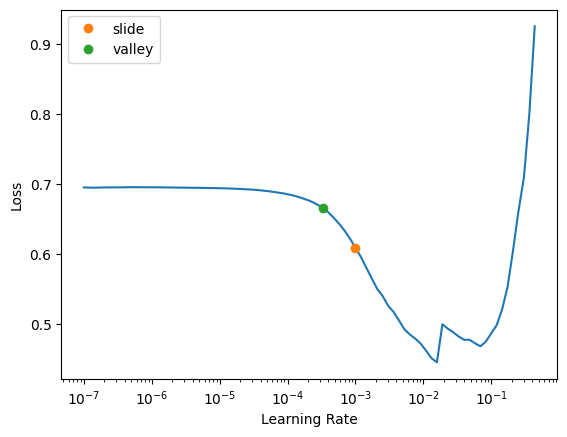

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
# Number of cycles
x = 1  # or any number based on your requirement

# Maximum learning rate
y = 0.0005000000474974513  # slide value from lr_find

learner.fit_one_cycle(x, y)

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.101297,0.096387,0.964302,01:19


In [ ]:
learner.save("dataset-classifier-distilroberta-stage-0")

Path('models/dataset-classifier-distilroberta-stage-0.pth')

In [ ]:
learner.export("models/dataset-classifier-distilroberta-stage-0.pkl")

## **Stage 1**

In [ ]:
# learner.load("dataset-classifier-distilroberta-stage-0")

In [ ]:
learner.unfreeze()

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()
/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


SuggestedLRs(slide=0.0030199517495930195, valley=5.248074739938602e-05)

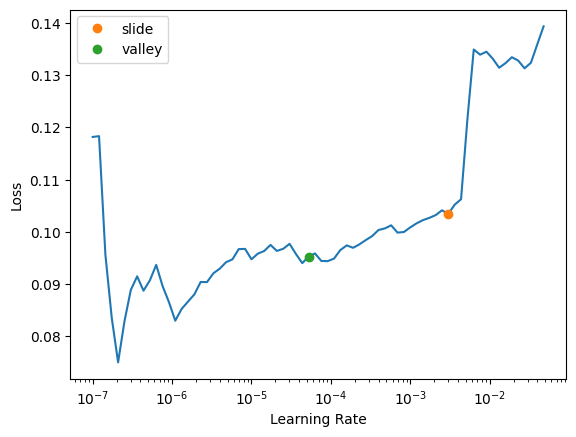

In [ ]:
learner.lr_find(suggest_funcs=[slide, valley])

In [ ]:
# Number of cycles
a = 5  # or any number based on your requirement

# Start learning rate (lower bound)
b = 5.248074739938602e-05  # valley value from lr_find

# End learning rate (upper bound)
c = 0.0030199517495930195  # slide value from lr_find

learner.fit_one_cycle(a, slice(b, c))

epoch,train_loss,valid_loss,accuracy_multi,time
0,0.097714,0.101536,0.962665,01:38
1,0.100408,0.099084,0.956338,01:37
2,0.097407,0.094027,0.962611,01:39
3,0.091816,0.090339,0.961028,01:38
4,0.086538,0.088719,0.962005,01:38


In [ ]:
learner.save("dataset-classifier-distilroberta-stage-1")

Path('models/dataset-classifier-distilroberta-stage-1.pth')

In [ ]:
learner.export("models/dataset-classifier-distilroberta-stage-1.pkl")